<a href="https://colab.research.google.com/github/shutiman/Course-Data-Lit-/blob/master/Glass_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment ( Data Visualization) - School of AI - Data Lit

**by: Fernando Chica**


We need to solve a crime, in the crime scene there isn't evidence like DNA or fingerprints. The only hint that we have is that there is broken glass. Near to the crime scene the experts found pieces of glass with fingerprints of a posible suspect. So, we need to determinate if the glass finded in the crime scene is the same that the one with the fingerprint. Its important not only demonstrate that the both piece of glass are the same but the glass in the crime scene are different of other kinds of glass. 

We are going to use the dataset of Glass Identification avalible in "http://archive.ics.uci.edu/ml/datasets/glass%20identification". This data consists of 214 observations with 10 features of the composition of the glass and 6 different types of glass.

**The columns in this dataset are:**
1. RI: refractive index
2. Na: Sodium
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silica
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass (Target label)

**The Target label, Type of Glass has 6 classes:**

1. building_windows_float_processed
2.  building_windows_non_float_processed
3.  vehicle_windows_float_processed
5. containers
6. tableware
7.  headlamps

In this case we are use the information of only 3 different types of glases (named in the dataset as 1,2 and 7 each type) this are the one with most information in the dataset

### The question

The glass in the crime scene is the same as the found with the fingerprint?
*So, let's do it :D. *

### Import the necesary libraries

In [0]:

import pandas as pd      # Process dataset
import numpy as np       # mathematical tool 
import seaborn as sns    # plot tools
import matplotlib.pyplot as plt  # plot tools
from sklearn import decomposition



We are going to extract the information of five observations of a type of glass (number 1 in the dataset) that is going to use as the glass found in the scene and compare this characteristic with other five observations of other type of glass (number 7 in the dataset). The main idea is to compare this two observation and determine if is the same glass. 

** This first section describe the preprocesing process to adapt the dataset from the url to simulate the crime scene. From the begin we know that there both glass are different but we we have to pretend that we don't know anything xD.**

### Import the Dataset from the url and adapt to the emule the crime scene

We are going to import directrly from the web the dataset, so we use a condition; Import the dataset from the URL, opposite case, print an error. 

After, we are going to drop the information of glass type different of 1,2 or 7. Then, extract two different observationts, the first one (glass type 1) saved in the variable "crime"  to be the glass in the crime scene and other (glass type 7) saved in the variable "evidence" to be the glass with the fingerprint. It can be noted that this two observations, one are extracted from dataset also is drop out. 

In [2]:
try:
    data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
                       ,names=['RI','Na','Mg','Al','Si','k','Ca','Ba','Fe','Type'])
    data = data.drop(data[data['Type']== 3 ].index)
    data = data.drop(data[data['Type']== 5].index)
    data = data.drop(data[data['Type']== 6 ].index)
    data = data.reset_index(drop=True)

    print('Glass Identification Data Set has {} rows with {} features each'.format(*data.shape))
    

except:
    print('Error! Getting data')

Glass Identification Data Set has 175 rows with 10 features each


We use five observations of glass type 1 and five observations of glass type 7, to represent the glass found in the crime scene and the glass found with the fingerprint, respectively.

In [14]:
# The firt position of the dataset has information about one observation of the glass type 1

print('Extract the observation in the first positions from 0 to 4 for the glass type 1')
print(data.head(5))
crime = data[0:4]

print('----------------------------------------------------------------')

# The last position of the dataset has information about one observation of the glass type 7
print('Extract the observation in the last positions from 171 to 174 of the glass type 7')
print(data.tail(5))
evidence = data[171:174]


Extract the observation in the first position (0) for the glass type 1
        RI     Na    Mg    Al     Si     k    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
----------------------------------------------------------------
Extract the observation in the last position (174) of the glass type 7
          RI     Na   Mg    Al     Si     k    Ca    Ba   Fe  Type
170  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
171  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
172  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
173  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
174  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7


In [15]:
Info = data[5:170]   # Use the information without the observation saved in the variable crime and evidence
print('Info Data Set has {} rows with {} features each'.format(*Info.shape))


Info Data Set has 165 rows with 10 features each


In [68]:
# We can notice that there is only 3 types of glass: 1,2 and 7

Infogp = Info.groupby('Type')

Infogp.Type.unique()




Type
1    [1]
2    [2]
7    [7]
Name: Type, dtype: object

# List of information about the crime



1.   Broken Glass =>   variable "crime"
2.   Broken Glass with fingerprint  => variable "eviende"
3.   Database to compare => variable "Info"


We need to analize the characteristics of the three different type of glass to be able to distinguish one from the other. The problems is that there is lot of characteristics and we are humans, only can see three dimensions (yet). So, first we are going to plot a diagram of the correlations between all the characteristics of the dataset.


## Visualization

### Heatmap of correlations

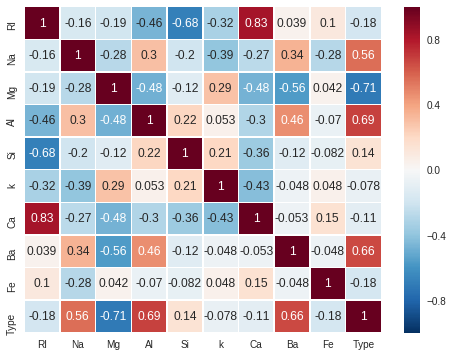

In [17]:
plt.subplots(figsize=(8,6))
sns.heatmap(Info.corr(),annot=True, linewidth=.5,)

It can be noticed that there is some variables that is correlated like Ca and RI or Ba and Al, but in the end of the correlation table there is the feature "Type" that indicates the type of the glass. In this case, the information shows that the features **Na, Al** and **Ba** are the most correlated with the "Type", in other words this features are the one who contribute most information about the kind of glass. So, we are going to use this three features to diferenciate the characteristics of a particular glass and determine if the glass with the fingerprint is the same that was found in the crime scene.

Before to visualize we need to explore this features, for this, we use "describe" from the library pandas and we get the general information of this features in all the dataset.

In [69]:
print('Information of Na')
print(Infogp.Na.describe())
print('')

print('Information of Ba')
print(Infogp.Ba.describe())
print('')


print('Information of Al')
print(Infogp.Al.describe())
print('')

Information of Na
      count       mean       std    min     25%     50%      75%    max
Type                                                                   
1      65.0  13.221846  0.507943  12.45  12.810  13.140  13.4900  14.77
2      76.0  13.111711  0.664159  10.73  12.885  13.155  13.4325  14.86
7      24.0  14.449583  0.746409  11.95  14.185  14.630  14.8800  15.79

Information of Ba
      count      mean       std  min    25%    50%    75%   max
Type                                                           
1      65.0  0.013692  0.086973  0.0  0.000  0.000  0.000  0.69
2      76.0  0.050263  0.362340  0.0  0.000  0.000  0.000  3.15
7      24.0  0.942917  0.686139  0.0  0.555  0.665  1.555  2.88

Information of Al
      count      mean       std   min     25%   50%     75%   max
Type                                                             
1      65.0  1.152923  0.277684  0.29  1.1100  1.21  1.3200  1.69
2      76.0  1.408158  0.318340  0.56  1.2475  1.46  1.5700  2.12


### Density Plots

We can notice that in the feature Ba there is a lot of 0 values in the glass type 1 and 2. Thus, we use the other two features to density plots and visualize the characteristic of the different kind of glass. A Density Plot visualises the distribution of data over a continuous interval or time period, an advantage Density Plots have over Histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used (which benefits us by the amount of observations we have of the evidence of the crime). 

*Other important fact is that the data are in numerical order regarding to type, so the from the position 0 to 64 are type 1, from 65 to 141 are type 2 and from 142 to 165 are type 7, this can be useful if we use pca.*

First we compare between the glass found in the crime scene and the other with the fingerprints.

Text(0, 0.5, 'Density')

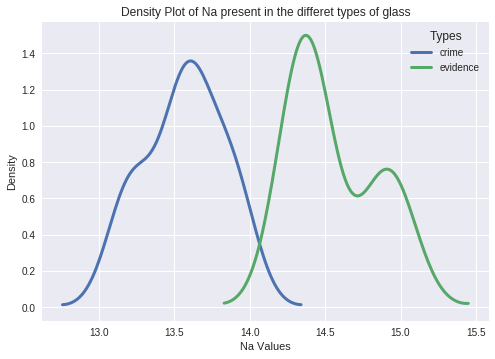

In [73]:
sns.distplot(crime['Na'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='crime') 
sns.distplot(evidence['Na'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='evidence') 

plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot of Na present in the differet types of glass')
plt.xlabel('Na Values')
plt.ylabel('Density')


Observing the graph, it's easy to distinguish that they have a different distribution of data between both, this fact point to that there are different types of glass. Now, let's check with the density plots of the all dataset.

Text(0, 0.5, 'Density')

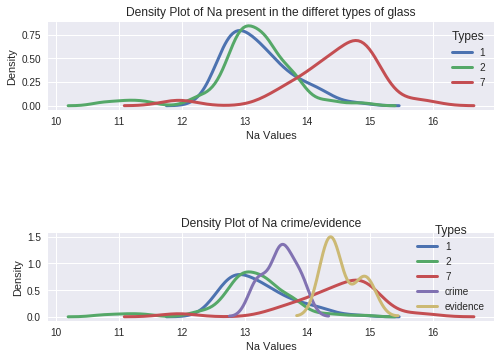

In [74]:
types = [1,2,7]

plt.subplot(311)
# Iterate through the types
for typ in types :
    # Subset to the Info
    subset = Info[Info['Type'] == typ]
    
    # Draw the density plot
    sns.distplot(subset['Na'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=typ, 
                 )
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot of Na present in the differet types of glass')
plt.xlabel('Na Values')
plt.ylabel('Density')



plt.subplot(313)
# Iterate through the types
for typ in types :
    # Subset to the Info
    subset = Info[Info['Type'] == typ]
    
    # Draw the density plot
    sns.distplot(subset['Na'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=typ, 
                 )
    

sns.distplot(crime['Na'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='crime') 
sns.distplot(evidence['Na'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='evidence') 


# Plot formatting
plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot of Na crime/evidence')
plt.xlabel('Na Values')
plt.ylabel('Density')

In terms of Na feature, we can notice that the evidence glass tends to a glass type 7 while the crime glass tends to a glass type 1, again is shown a difference between both.

Text(0, 0.5, 'Density')

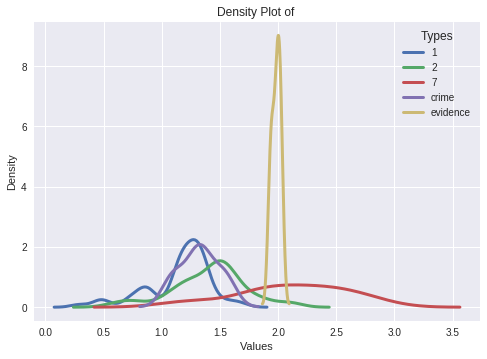

In [54]:
# Iterate through the types
for typ in types :
    # Subset to the Info
    subset = Info[Info['Type'] == typ]
    
    # Draw the density plot
    sns.distplot(subset['Al'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=typ
                 )

sns.distplot(crime['Al'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='crime') 
sns.distplot(evidence['Al'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='evidence')
             
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot of ')
plt.xlabel('Values')
plt.ylabel('Density')




In terms of "Al" feature, we can notice that the evidence glass tends to a glass type 7 while the crime glass tends to a glass type 1, similar that the result with the "Na" feature.

At this point we have some proofs point to that the glass found in the crime scene is different than the other with the fingerprints. But as a final test we are going to use PCA to reduce the dimensionality of the observations and seek for similar or diferent characteritics in the features. 

In [0]:

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

Infos = Info[['Na','Al']]        # only use the features with more corelation

X_std = StandardScaler().fit_transform(Infos)   # stadarize the dataset

sklearn_pca = sklearnPCA(n_components=2)
t1 = sklearn_pca.fit_transform(X_std[0:64])    #extract two firs PCA from type 1

sklearn_pca = sklearnPCA(n_components=2)      #extract two firs PCA from type 7
t3 = sklearn_pca.fit_transform(X_std[142:165])


X_std = StandardScaler().fit_transform(crime[['Na','Al']])

sklearn_pca = sklearnPCA(n_components=2)
c1 = sklearn_pca.fit_transform(X_std) #extract two firs PCA from crime


X_std = StandardScaler().fit_transform(evidence[['Na','Al']])

sklearn_pca = sklearnPCA(n_components=2) #extract two firs PCA from evidence
e1 = sklearn_pca.fit_transform(X_std)

0 to 64 are type 1,  from 142 to 165 are type 7

No handles with labels found to put in legend.


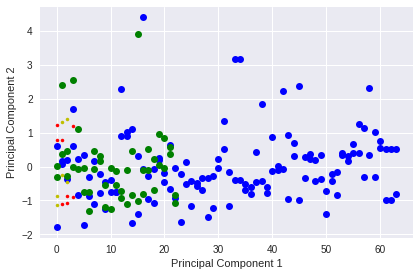

In [168]:
#Visualize PCA

plt.figure(figsize=(6, 4))
plt.plot(t1, 'bo')
plt.plot(t3, 'go')
plt.plot(c1,'r.')
plt.plot(e1,'y.')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()


Using PCA we can't find information about if the two glass are different, PCA is a linear transformation technique and the results shows that there is no difference in the different types of glass even in all the dataset. Thus, because of the information in the density plots we conclude that glass found in the crime scene and the other with the fingerprint are different, we need to will back to the crime scene to find more evidence.